Under the hood, many of the conversions are done using `astropy`. Unfortunately, `astropy` does not yet cover conversions to redshifts, and since I did not want to wait for this feature (and was too lazy to make a PR myself), I just wrote this quick package.

In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyhiframe import pyhiframe as hif

In [43]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)

### Initiate the converter

In [31]:
converter = hif.HIConverter()

HI rest frequency in MHz

In [32]:
converter.nu0

1420.4058

`astropy` is used under the hood for many of the conversions.

In [33]:
print(converter.nu0_u)
print(converter.v_frame)

1420.4058 MHz
[(Unit("Hz"), Unit("km / s"), <function doppler_relativistic.<locals>.to_vel_freq at 0x1123d6b70>, <function doppler_relativistic.<locals>.from_vel_freq at 0x119a1ab70>), (Unit("Angstrom"), Unit("km / s"), <function doppler_relativistic.<locals>.to_vel_wav at 0x119a087b8>, <function doppler_relativistic.<locals>.from_vel_wav at 0x119a08488>), (Unit("eV"), Unit("km / s"), <function doppler_relativistic.<locals>.to_vel_en at 0x119a08400>, <function doppler_relativistic.<locals>.from_vel_en at 0x119a08840>)]


In [34]:
nus = np.arange(800., 1400.)

In [35]:
zs = converter.nu2z(nus)

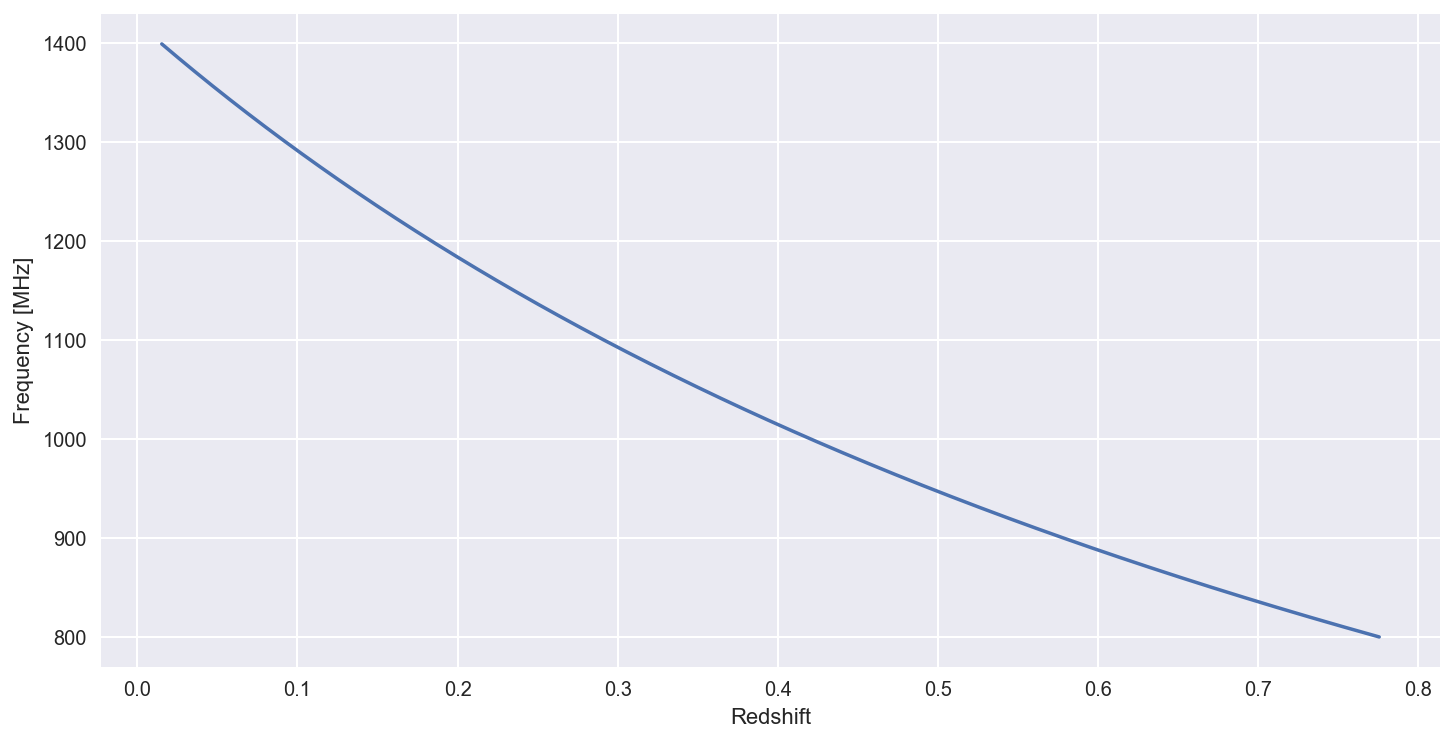

In [44]:
plt.plot(zs, nus)
pl.xlabel('Redshift')
pl.ylabel('Frequency [MHz]');

In [38]:
v_radio = hif.HIConverter(mode='radio').nu2velo(nus)
v_optical = hif.HIConverter(mode='optical').nu2velo(nus)
v_relativistic = hif.HIConverter(mode='relativistic').nu2velo(nus)

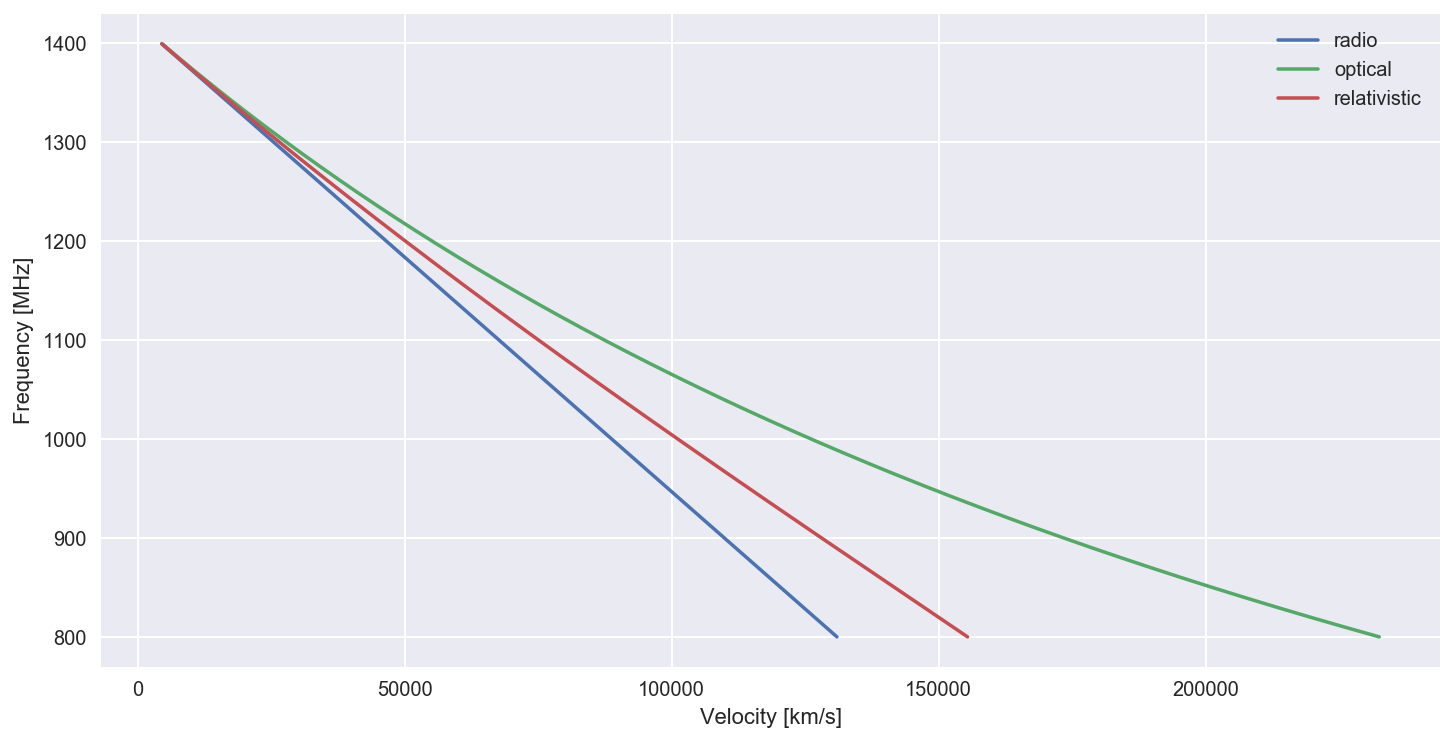

In [45]:
pl.plot(v_radio, nus, label='radio')
pl.plot(v_optical, nus, label='optical')
pl.plot(v_relativistic, nus, label='relativistic')
pl.legend()
pl.xlabel('Velocity [km/s]')
pl.ylabel('Frequency [MHz]');